### Agentic RAG

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          

In [4]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retriever=vectorstore.as_retriever()

In [5]:
retriever.invoke("what is langgraph")

[Document(id='e87f0e28-cb35-4909-96a3-ff896d830a39', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment

In [6]:

from langchain_core.tools.retriever import create_retriever_tool

# assume you already have a retriever, e.g., from a vector store
retriever_tool = create_retriever_tool(
    retriever=retriever,
    name="retriever_vector_db_blog",
    description="Search and retrieve information about LangGraph."
)

print("Retriever tool created successfully!")


Retriever tool created successfully!


In [7]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and retrieve information about LangGraph.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001F2A05B1EE0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001F2A05A8470>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000001F2A05B39C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001F2A05A8470>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_conten

### Langchain Blogs- Seperate Vector Store


In [8]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'index | 🦜️🔗 LangChain', 'description': '⚠️ THESE DOCS ARE OUTDATED. Visit the new v1.0 docs', 'language': 'en'}, page_content='\n\n\n\n\nindex | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main content⚠️ THESE DOCS ARE OUTDATED. Visit the new v1.0 docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseindexBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesindexHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHo

In [9]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [10]:
from langchain_core.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [11]:
tools=[retriever_tool,retriever_tool_langchain]

### LangGraph Workflow

In [12]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [13]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hi". We need to respond appropriately. It\'s a greeting. We can respond with a friendly greeting and ask how we can help. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 72, 'total_tokens': 125, 'completion_time': 0.109097333, 'prompt_time': 0.002740353, 'queue_time': 0.046990087, 'total_time': 0.111837686}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_70d048ba3c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--1c699869-f17e-4e4b-8810-c80b23dd3ccb-0', usage_metadata={'input_tokens': 72, 'output_tokens': 53, 'total_tokens': 125})

In [14]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="openai/gpt-oss-120b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [15]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain_classic.hub import pull

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [16]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="openai/gpt-oss-120b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [21]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="openai/gpt-oss-120b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [22]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="openai/gpt-oss-120b")
    response = model.invoke(msg)
    return {"messages": [response]}

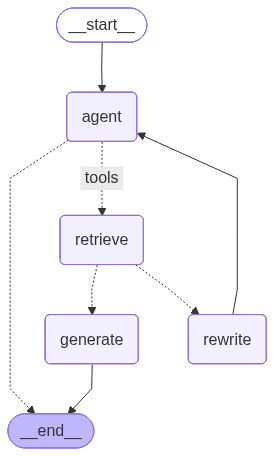

In [23]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [24]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='c2c0df22-5cfc-4688-aa68-3f4ec7e44336'),
  AIMessage(content='**LangGraph** (often written as *LangGraph*) is an open‑source Python framework for building **stateful, multi‑step LLM applications** as **graph‑structured workflows**. It sits on top of LangChain (or other LLM‑toolkits) and adds a lightweight “graph engine” that lets you:\n\n| Aspect | What LangGraph Provides |\n|--------|--------------------------|\n| **Graph‑oriented programming model** | Define a workflow as a directed graph of *nodes* (functions, prompts, agents, tools, etc.) and *edges* (transitions). Each node receives the current **state**, can mutate it, and returns a *next‑node* identifier. |\n| **Explicit, persistent state** | The whole conversation / task state is a single mutable dictionary (`state`). Every node can read/write to it, making it easy to keep track of context, intermediate results, and control f

In [25]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='daa79063-b5ec-4bcb-82b3-a6e541eb2d6b'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks "What is Langchain?" We need to answer. Should we use retrieval? Possibly we can retrieve from blogs. Let\'s search.', 'tool_calls': [{'id': 'fc_dac76f8f-64e0-4fa0-91f9-384d3a5aff97', 'function': {'arguments': '{"query":"What is Langchain"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 172, 'total_tokens': 237, 'completion_time': 0.134691923, 'prompt_time': 0.006890877, 'queue_time': 0.047371953, 'total_time': 0.1415828}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_fd1fe7f861', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--920f7a70-8430-448c-b86d-6e8d69dac1fb-0', tool_calls=[{'na

In [26]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='4be9d169-949e-4894-acec-a5b8f3128c56'),
  AIMessage(content='**Machine learning (ML)** is a subfield of artificial intelligence that focuses on building systems that can learn from data, identify patterns, and make decisions or predictions without being explicitly programmed for each specific task.\n\n### Core Idea\n- **Learning from data**: Instead of hard‑coding rules, an ML algorithm discovers the underlying structure of the data through exposure to examples.\n- **Generalization**: The model uses what it has learned to perform well on new, unseen data.\n\n### How It Works (High‑level)\n1. **Collect data** – Gather labeled (supervised) or unlabeled (unsupervised) examples.\n2. **Choose a model** – A mathematical structure (e.g., linear regression, neural network, decision tree) that can represent patterns.\n3. **Train the model** – Adjust the model’s parameters to minimize 